In [23]:
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [3]:
data = load_breast_cancer()

In [4]:
type(data)

sklearn.utils.Bunch

In [5]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [6]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [8]:
obs = np.c_[data.data, data.target]

In [9]:
collumns = np.append(data.feature_names,"Target")

In [11]:
df = pd.DataFrame(obs, columns=collumns)

In [12]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [13]:
df.shape

(569, 31)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Target'], df['Target'], test_size=0.3)

In [15]:
scalar = StandardScaler()

In [16]:
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [17]:
X_train.shape[1]

30

In [18]:
model = tf.keras.models.Sequential([
          tf.keras.layers.InputLayer(input_shape=X_train.shape[1])
])

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [19]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics='accuracy')

In [20]:
r = model.fit(X_train,y_train, epochs=100, validation_data=(X_test,y_test))

Epoch 1/100
13/13 [==============================] - 1s 14ms/step - loss: 0.7408 - accuracy: 0.5980 - val_loss: 0.7841 - val_accuracy: 0.5556
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6606 - accuracy: 0.6357 - val_loss: 0.6935 - val_accuracy: 0.6082
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5890 - accuracy: 0.6910 - val_loss: 0.6163 - val_accuracy: 0.6550
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5274 - accuracy: 0.7337 - val_loss: 0.5509 - val_accuracy: 0.7310
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4753 - accuracy: 0.7688 - val_loss: 0.4947 - val_accuracy: 0.7778
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4311 - accuracy: 0.8015 - val_loss: 0.4464 - val_accuracy: 0.8246
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3931 - accuracy: 0.8367 - val_loss: 0.4061 - val_accuracy: 0.8480
Epoch 8/100


In [21]:
model.evaluate(X_train,y_train)

13/13 [==============================] - 0s 787us/step - loss: 0.0899 - accuracy: 0.9774


[0.08993560820817947, 0.9773869514465332]

In [22]:
model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 998us/step - loss: 0.0904 - accuracy: 0.9649


[0.09039028733968735, 0.9649122953414917]

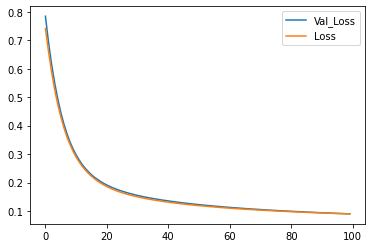

In [24]:
plt.plot(r.history['val_loss'],label = 'Val_Loss')
plt.plot(r.history['loss'],label = 'Loss')

plt.legend()

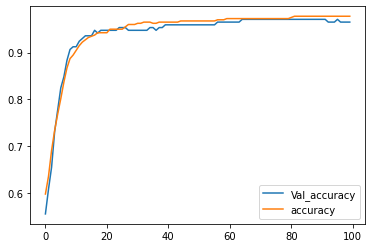

In [25]:
plt.plot(r.history['val_accuracy'],label = 'Val_accuracy')
plt.plot(r.history['accuracy'],label = 'accuracy')

plt.legend()